In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


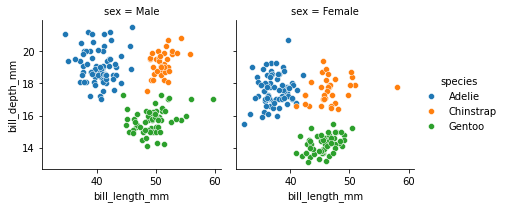

In [4]:
g = sns.FacetGrid(penguins, col="sex", hue="species")
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()
g.savefig("36_s2m3_4.png")

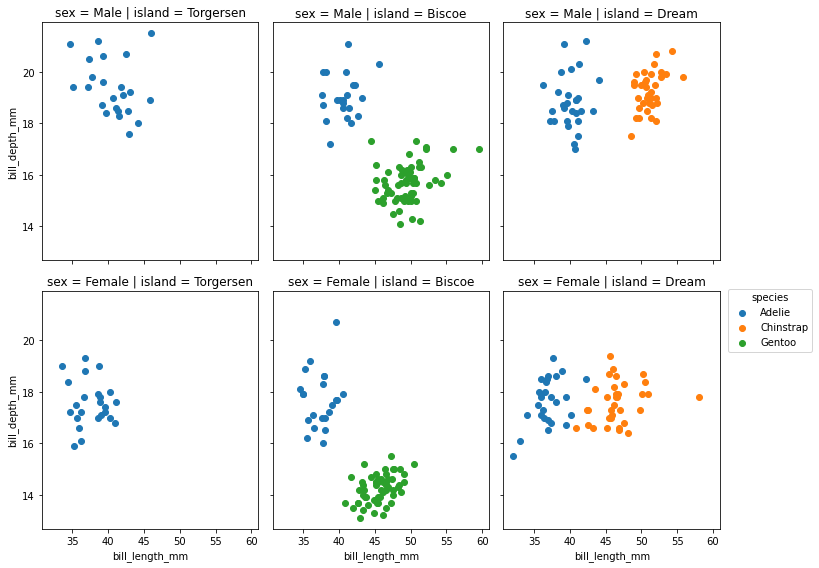

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

sex = penguins["sex"].dropna().unique()
island = penguins["island"].dropna().unique()
species = penguins["species"].dropna().unique()

for i in range(len(sex)):
    for j in range(len(island)):
        for k in range(len(species)):
            try:
                axes[i][j].scatter(penguins.loc[penguins["sex"] == sex[i]].loc[penguins["island"] == island[j]].loc[penguins["species"] == species[k]]["bill_length_mm"], 
                                   penguins.loc[penguins["sex"] == sex[i]].loc[penguins["island"] == island[j]].loc[penguins["species"] == species[k]]["bill_depth_mm"])
                axes[i][j].set_title(f"sex = {sex[i]} | island = {island[j]}")
            except:
                pass
        axes[len(sex)-1, j].set_xlabel("bill_length_mm")
        
    axes[i, 0].set_ylabel("bill_depth_mm")

# fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.legend(species,  title="species", bbox_to_anchor=(0.95, 0.5))
fig.tight_layout(rect=[0,0,0.85,1])
fig.savefig("36_s2m3_8.png")

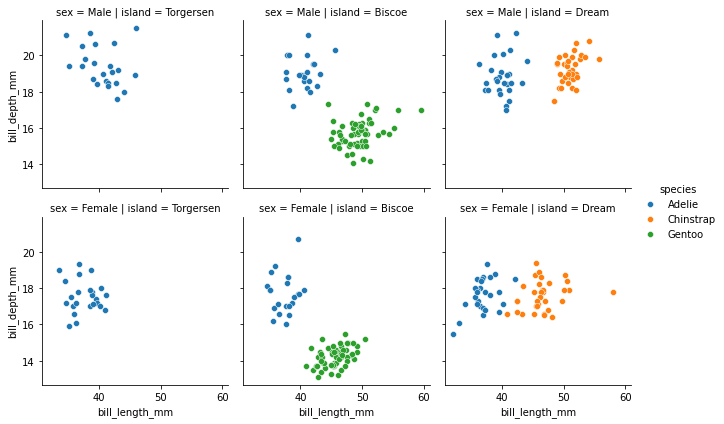

In [10]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()
g.savefig("36_s2m3_5.png")

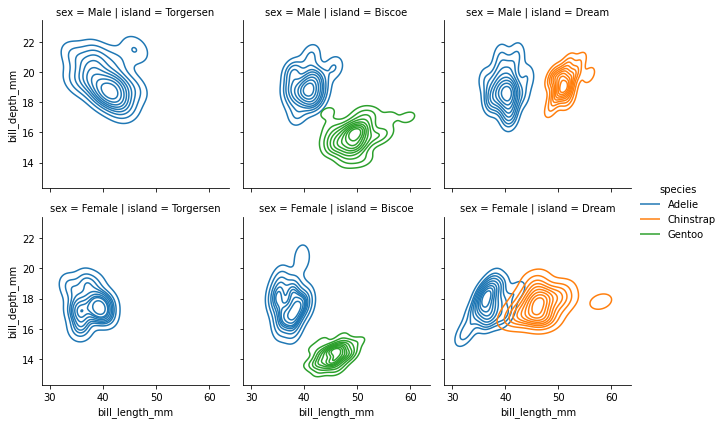

In [61]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()
g.savefig("36_s2m3_9.png")

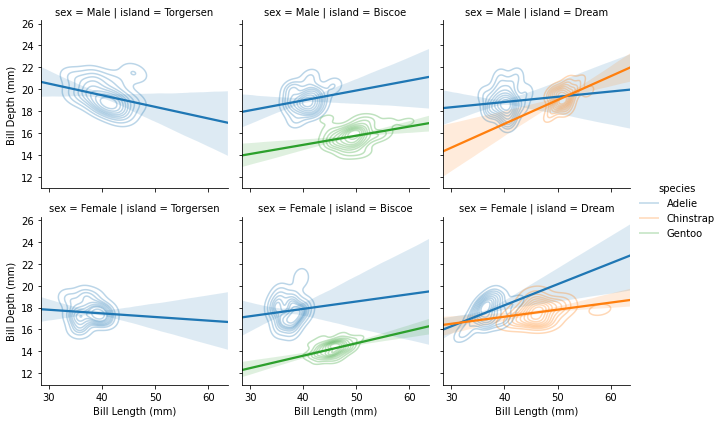

In [107]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)

g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
g.add_legend()

g.savefig("36_s2m3_10.png")

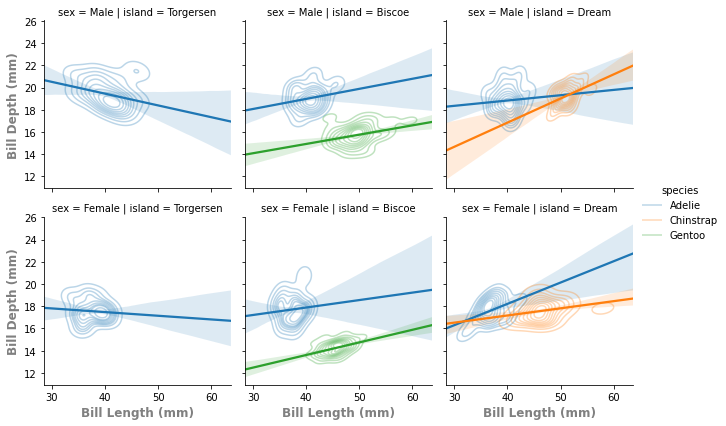

In [109]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)

g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)", 
                  fontdict={"fontsize":"large", "color":"gray", "fontweight":"bold"})
g.add_legend()

g.savefig("36_s2m3_12.png")

In [132]:
i = 2
sex = "Male" if i == 2 else "Female"
sex

'Male'

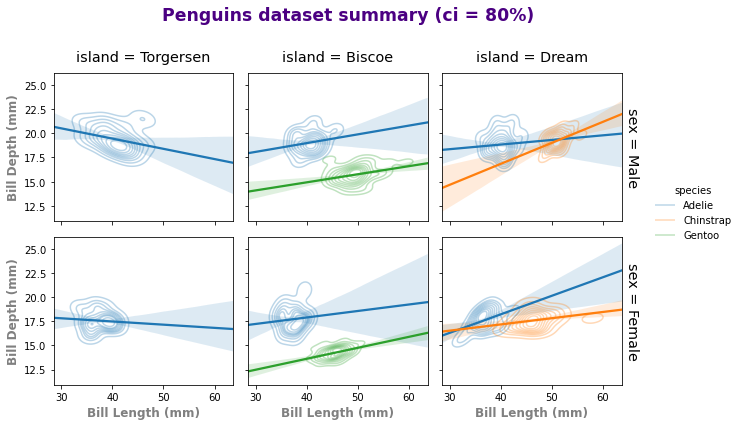

In [145]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species", margin_titles=True, despine=False)
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)
g.add_legend()

g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)", 
                  fontdict={"fontsize":"large", "color":"gray", "fontweight":"bold"})

axs = g.axes.ravel()
for i, ax in enumerate(axs):
    if i < 3:
        ax.set_title(ax.get_title(), fontdict={"fontsize":"x-large", "color":"k"}, pad=12)
    if i%3 == 2:
        sex = "Male" if i == 2 else "Female"
        ax.texts.clear()
        text = ax.annotate(f"sex = {sex}", xy=(1.02, .5), xycoords="axes fraction", rotation=270, 
                           ha="left", va="center", fontsize="x-large", color="k")

g.fig.suptitle("Penguins dataset summary (ci = 80%)        ", 
               fontsize="xx-large", fontweight="bold", color="indigo")
g.fig.tight_layout(rect=[0,0,0.88,0.97])
g.savefig("36_s2m3_13.png")

In [128]:
ax_tmp = g.axes[0][2]

In [129]:
ax_tmp.texts.clear()

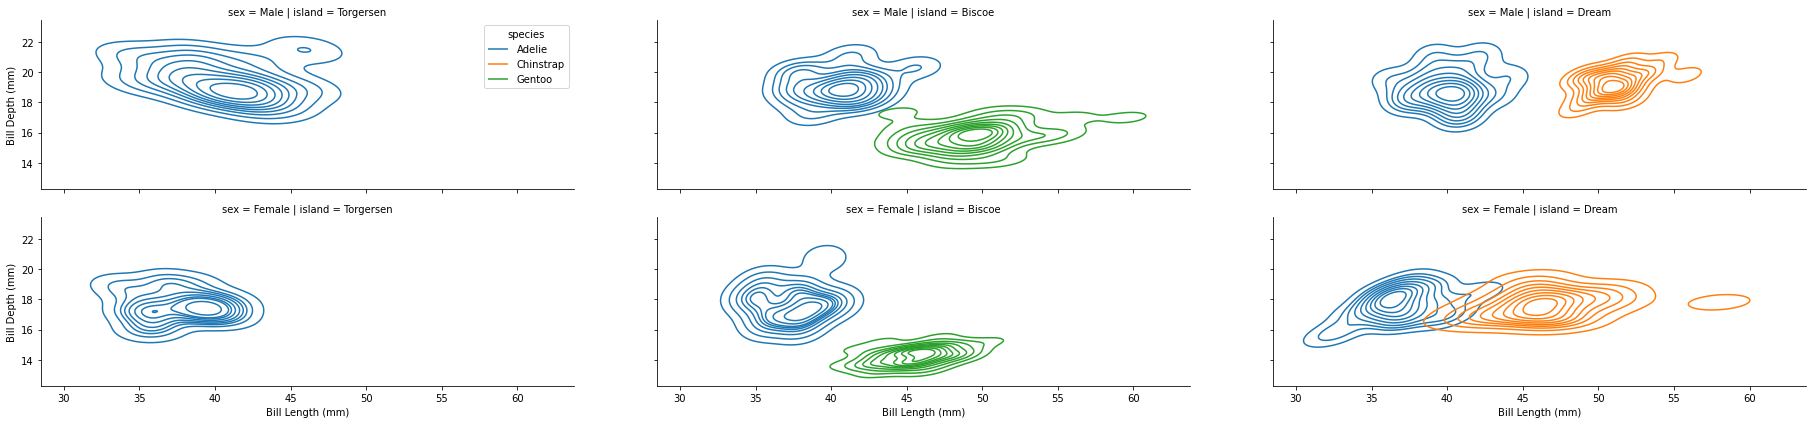

In [79]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species", legend_out=False, aspect=3)
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()

g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
axs = g.axes.ravel()

for ax in axs:
    ax.set_aspect("equal")

g.tight_layout()    

In [71]:
axs = g.axes.ravel()
axs

array([<AxesSubplot:title={'center':'sex = Male | island = Torgersen'}, ylabel='Bill Depth (mm)'>,
       <AxesSubplot:title={'center':'sex = Male | island = Biscoe'}>,
       <AxesSubplot:title={'center':'sex = Male | island = Dream'}>,
       <AxesSubplot:title={'center':'sex = Female | island = Torgersen'}, xlabel='Bill Length (mm)', ylabel='Bill Depth (mm)'>,
       <AxesSubplot:title={'center':'sex = Female | island = Biscoe'}, xlabel='Bill Length (mm)'>,
       <AxesSubplot:title={'center':'sex = Female | island = Dream'}, xlabel='Bill Length (mm)'>],
      dtype=object)

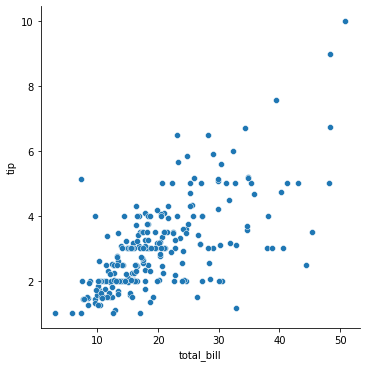

In [65]:
g = sns.relplot(data=tips, x="total_bill", y="tip")

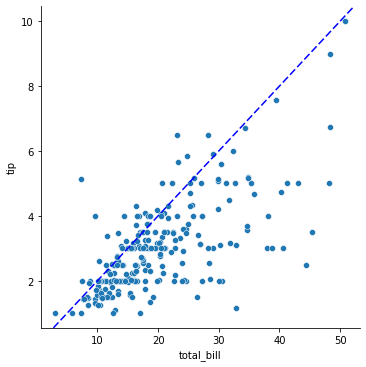

In [79]:
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

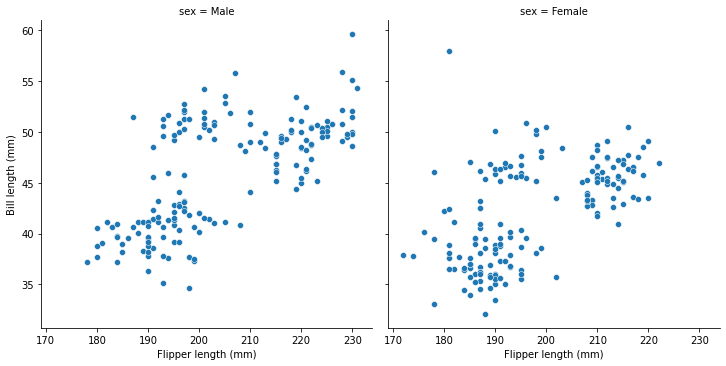

In [80]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

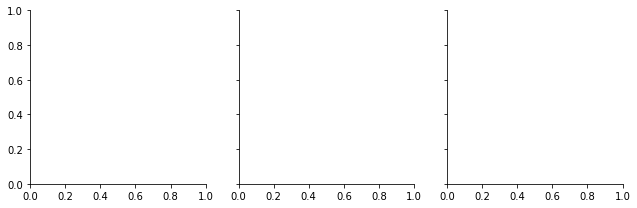

In [13]:
g = sns.FacetGrid(penguins, col="island")

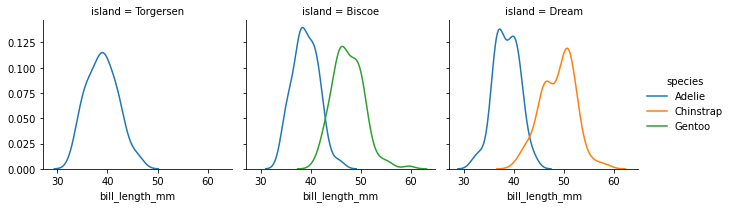

In [15]:
g = sns.FacetGrid(penguins, col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm")
g.add_legend()

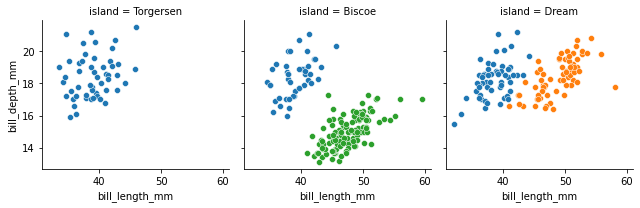

In [17]:
g = sns.FacetGrid(penguins, col="island", hue="species")
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")

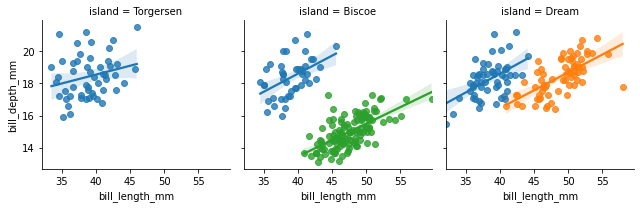

In [18]:
g = sns.FacetGrid(penguins, col="island", hue="species")
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm")

In [19]:
tips = sns.load_dataset("tips")

In [21]:
ordered_days = tips["day"].value_counts().index
ordered_days

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

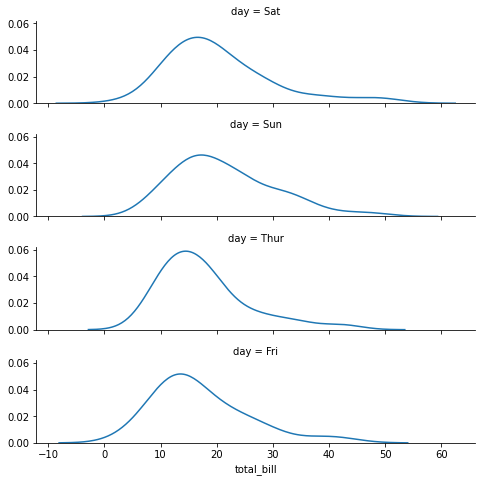

In [23]:
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4
                 )
g.map(sns.kdeplot, "total_bill")

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


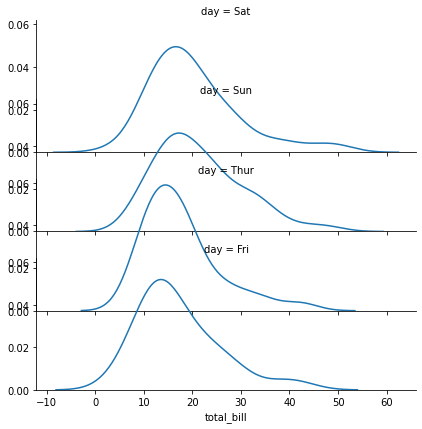

In [41]:
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,
                  gridspec_kws={"hspace":-0.4}
                 )
g.map(sns.kdeplot, "total_bill")

# for row_val, ax in g.axes_dict.items():
#     ax.set_facecolor("none")
for ax in g.axes[:,0]:
    ax.set_facecolor("none")

In [37]:
g.axes

array([[<AxesSubplot:title={'center':'day = Sat'}>],
       [<AxesSubplot:title={'center':'day = Sun'}>],
       [<AxesSubplot:title={'center':'day = Thur'}>],
       [<AxesSubplot:title={'center':'day = Fri'}, xlabel='total_bill'>]],
      dtype=object)

In [40]:
g.axes[1][0]

<AxesSubplot:title={'center':'day = Sun'}>

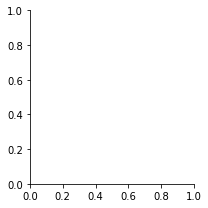

In [42]:
sns.FacetGrid(tips)

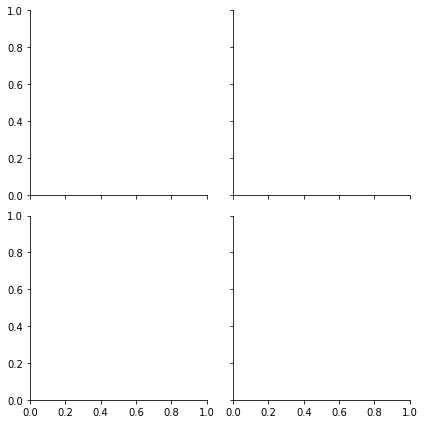

In [43]:
sns.FacetGrid(tips, col="time", row="sex")

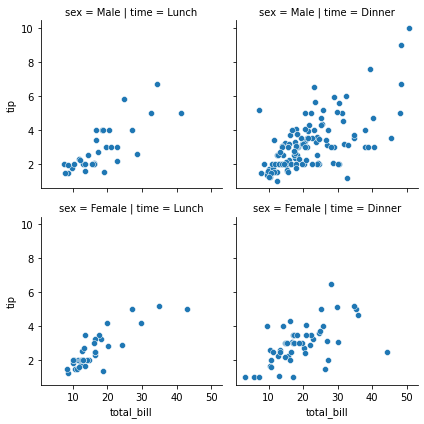

In [44]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

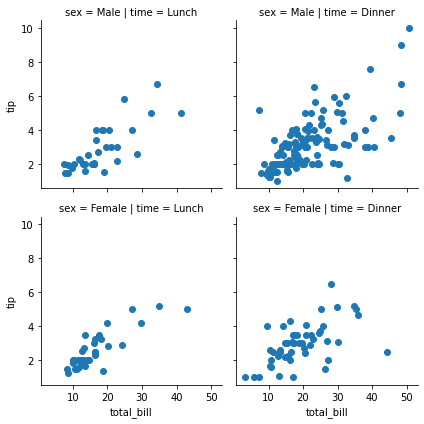

In [45]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(plt.scatter, "total_bill", "tip")

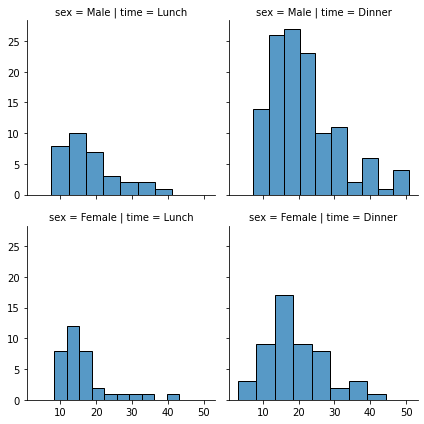

In [54]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

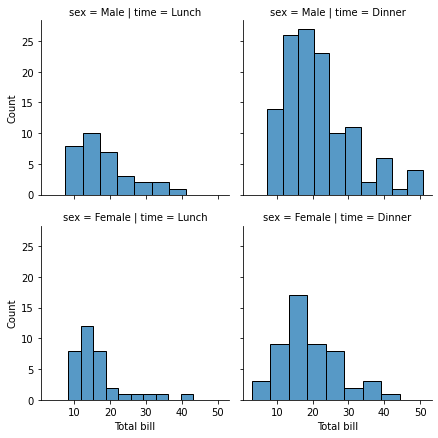

In [55]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")
g.set_axis_labels("Total bill", "Count")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor 

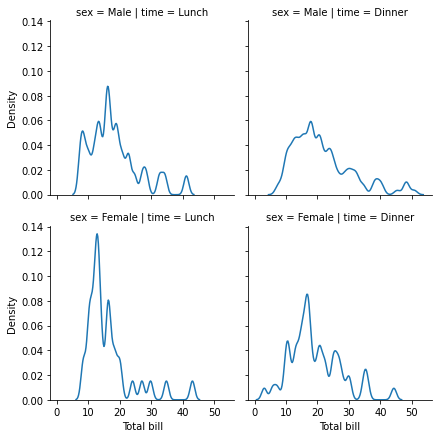

In [59]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.kdeplot, x="total_bill", bw=0.1)
g.set_axis_labels("Total bill", "Density")